## MISSION III - PREVISION OF THE CUNSOMMATION 
- Holt Winters methode 
- SARIMA méthode 

In [33]:
import os
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [34]:
# Load the data 
df = pd.read_csv('./data/data_mission_3.csv')
print(df.shape)
df.head()

(96, 7)


,mois,consommation_totale,climatisation,chauffage,dju,conso_corr,conso_cvs
0,2012-01-01,51086,0.0,409.0,409.0,28795.416369,28673.072512
1,2012-02-01,54476,0.0,517.9,517.9,26250.344101,26247.029178
2,2012-03-01,43156,0.0,215.6,215.6,31405.755915,29206.547030
3,2012-04-01,40176,2.2,191.2,193.4,29635.660454,28748.432058
4,2012-05-01,35257,33.5,68.4,101.9,29703.429164,29556.530261


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mois                 96 non-null     object 
 1   consommation_totale  96 non-null     int64  
 2   climatisation        96 non-null     float64
 3   chauffage            96 non-null     float64
 4   dju                  96 non-null     float64
 5   conso_corr           96 non-null     float64
 6   conso_cvs            96 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.4+ KB


### A- méthode de Holt-Winters 

- révision à l'aide du lissage exponentiel par la méthode de Holt-Winters
- La méthode ExponentialSmoothing de statsmodels est utilisée pour modéliser le lissage exponentiel d'Holt-Winters.

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing

y = np.asarray(df["conso_corr"])
hw = ExponentialSmoothing(y, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [37]:
df = df.set_index('mois')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 2012-01-01 to 2019-12-01
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   consommation_totale  96 non-null     int64  
 1   climatisation        96 non-null     float64
 2   chauffage            96 non-null     float64
 3   dju                  96 non-null     float64
 4   conso_corr           96 non-null     float64
 5   conso_cvs            96 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.2+ KB


In [39]:
df.head()

,consommation_totale,climatisation,chauffage,dju,conso_corr,conso_cvs
mois,,,,,,
2012-01-01,51086,0.0,409.0,409.0,28795.416369,28673.072512
2012-02-01,54476,0.0,517.9,517.9,26250.344101,26247.029178
2012-03-01,43156,0.0,215.6,215.6,31405.755915,29206.547030
2012-04-01,40176,2.2,191.2,193.4,29635.660454,28748.432058
2012-05-01,35257,33.5,68.4,101.9,29703.429164,29556.530261


In [16]:
df.index

Index(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',
       '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
       '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
       '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
       '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
       '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
       '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
       '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
       '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
       '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
       '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',

In [17]:
pd.date_range(df.index[len(y)-1], periods=12, freq='M')

DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', freq='M')

In [19]:
hw_pred

array([29841.71772542, 27173.92247169, 30630.76239539, 28616.10460296,
       28859.52962233, 25812.42377204, 23851.22826201, 22857.61482878,
       28271.195437  , 30000.25150088, 28129.20422184, 27683.96601107])

In [20]:
#Visualisation de la prévision à 12 mois par Holt-Winters
plt.plot(df["conso_corr"], label='Consommation corrigée')
plt.plot(pd.date_range(df.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Prévision Holt-Winters')

plt.title("Consommation d'électricité en France - Prévision 2020")

plt.savefig("p9_graphs/prevision2019_holt-winters.png")
plt.legend()
plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

La méthode de Holt-Winters est la plus raisonnable des méthodes de lissage exponentiel. La prévision sur un an de la consommation, corrigée de l'effet température, tient compte de la saisonnalité. Ci-dessous une visualisation par restriction sur la période 2018/2019.

In [11]:
#Visualisation par restriction sur l'année de prévision et n-1 (2018/2019)
plt.plot(df["conso_corr"].iloc[-12:], label='Consommation corrigée')
plt.plot(pd.date_range(df.index[len(y)-1], periods=12, freq='M'), hw_pred, label='Prévision Holt-Winters')

plt.title("Consommation d'électricité en France 2018 - Prévision 2019")
        
plt.legend()
plt.savefig("p9_graphs/prevision_visu20182019_holt-winters.png")
plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

#### Analyse a posteriori

On tronque la série de l’année 2018, qu’on cherche ensuite à prévoir à partir de l’historique 2012-2017. Cette analyse permet d'avoir une idée de la qualité prédictive du modèle choisi.

In [21]:
df['2019':].shape

(12, 6)

In [22]:
#Troncature des données sur les années 2017 et 2018
df_tronc = df[:'2018']
x_prevision = df['2019':]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


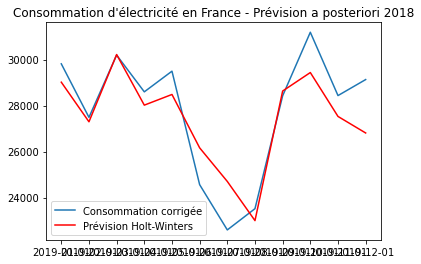

In [23]:
#Visualisation par restriction sur l'année 2018
y = df_tronc["conso_corr"]

hw = ExponentialSmoothing(y, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

plt.plot(df["conso_corr"].iloc[-12:], label='Consommation corrigée')
plt.plot(x_prevision.index, hw_pred, color='r', label='Prévision Holt-Winters')

plt.title("Consommation d'électricité en France - Prévision a posteriori 2018")

plt.savefig("p9_graphs/prevision_visu20182019_holt-winters_aposteriori.png")
plt.legend()
plt.show()

Par les chiffres nous pouvons calculer le MAPE (Mean Absolute Percentage). L’erreur absolue moyenne en pourcentage, en d'autres termes la moyenne des écarts en valeur absolue par rapport aux valeurs observées.

In [24]:
#Calcul du MAPE
mape = round((np.abs(1-hw_pred/x_prevision["conso_corr"])).mean()*100, 2)
mape

nan

Une analyse a posteriori sur 24 mois peut également être appliquée pour déterminer d'éventuelles limites prédictives.

In [380]:
#Troncature des données pour une prévision a posteriori de 24 mois
df_tronc = df[:'2017']
x_prevision = df['2018':]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


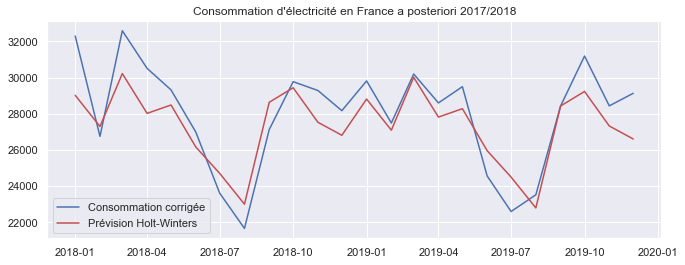

In [381]:
#Visualisation par restriction sur les années de prévision 2018 et 2019
y = df_tronc["conso_corr"]

hw = ExponentialSmoothing(y, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(24)

plt.plot(df["conso_corr"].iloc[-24:], label='Consommation corrigée')
plt.plot(x_prevision.index, hw_pred, color='r', label='Prévision Holt-Winters')

plt.title("Consommation d'électricité en France a posteriori 2017/2018")

plt.savefig("p9_graphs/prevision_visu20172018_holt-winters_aposteriori.png")
plt.legend()
plt.show()

In [382]:
#Calcul du MAPE
mape = round((np.abs(1-hw_pred/x_prevision["conso_corr"])).mean()*100, 2)
print("MAPE :" + str(mape))

MAPE :4.6


Cet indicateur nous permettra d'établir une comparaison avec les futures prévisions, et nous pourrons arrêter notre choix sur le modèle le plus performant. Dans l'immédiat, l'analyse a posteriori doublée sur 24 mois permet de penser que le modèle résiste plutôt bien aux impacts saisonniers sur du long terme. Ceci étant, les excédents des pics et creux ne sont pas totalement prévisibles par le modèle, les prévisions SARIMA seront-elles plus représentatives des variations de charge électrique?

- Stationnarisation de la série

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
adfuller(serie_corr_df['corrigee'])[1]

In [ ]:
kpss(serie_corr_df['corrigee'])[1]

- Ici on accepte mais la P-value tres proche du seuil critique

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from functions import plot_sortie_acf

y_len = len(serie_corr_df['corrigee']) # variable nécessaire pour l'utilisation de plot_sortie_acf

plot_sortie_acf(acf(np.asarray(serie_corr_df['corrigee'])), y_len)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation (𝐼−𝐵) 

In [ ]:
y_dif1 = serie_corr_df['corrigee'] - serie_corr_df['corrigee'].shift(12)

plot_sortie_acf(acf(np.asarray(y_dif1[13:])), y_len)

- q=1 Q=1

In [ ]:
adfuller(y_dif1[12:])[1]
#adfuller : H0 la serie n'est pas stationnaire'

In [ ]:
kpss(y_dif1[12:])[1]

In [ ]:
plot_sortie_acf(pacf(np.asarray(y_dif1[13:])), y_len, pacf=True)

In [ ]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print(results1.summary())

#print('Retard : p-value')
#for elt in [6, 12, 18, 24, 30, 36]:
    #print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

In [ ]:
results1.plot_diagnostics()
plt.show()

In [ ]:
model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
sarima_pred=results1.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(x_tronc['Mois'],x_tronc['corrigee'], label='Serie Corrigee ')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), sarima_pred, label='Predit N-1')
plt.legend()
#plt.show()

In [ ]:
pred_model2tronc = results1.get_forecast(12)
pred_tronc = pred_model2tronc.predicted_mean
MAE_sarima_model2=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model2

In [ ]:
serie_corr_df.shape

### Optimal SARIMA

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(x_tronc["corrigee"],
                         test='adf',
                          m=12,
                         seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()


Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [ ]:
#pred_model2tronc = smodel.predict(12)
pred_tronc = smodel.predict(12)

In [ ]:
MAE_sarima_model_optim=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model_optim

### Prédiction pour année+1

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

y= np.asarray(serie_corr_df["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(12)

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='Serie Corrigee sans dju')
plt.plot(pd.date_range(serie_corr_df.Mois[len(y)-1],
                       periods=12, freq='M'), hw_pred, label='Predit corrigée sans dju')
plt.legend()
#plt.show()